In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# How Much Sugar Do We Eat?
After watching That Sugar Film and getting more into cooking and food in general, I thought it would be interesting to see how much of particular ingredients the people of certain countries eat in their food.

## Sugar
The first check was how much sugar a number of countries take in. Companies have been putting more and more sugar into the products we eat for a number of decades now, particularly in products like soft drinks/sodas, which isn't great for our bodies. There are some stereotypical guesses one could make about the countries that consume the most sugar, but doing some data analysis is generally more informative.

In [3]:
df_base = pd.read_csv('data/food-facts/en.openfoodfacts.org.products.tsv', sep='\t')

C:\Users\TaeWoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


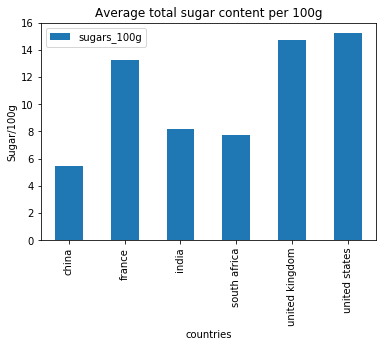

In [13]:
df_base.countries = df_base.countries.str.lower()

# 1. using groupby to group the rows by the country
# 2. as_index prevents forming of country as the second index and keeps it as a column. 
#    If you don't do this country will no longer be accesible as an column
# 3. using mean() to find the mean of each group. aggegate(np.mean()) can also be used but mean() is cythonized so is faster
mean_by_country = df_base.groupby('countries', as_index = False).mean()

# define desired countries and access their means to plot
ind = mean_by_country.countries.isin(['france', 'south africa', 'united states', 'united kingdom', 'india', 'china']) 
mean_by_country.loc[ind].plot(x='countries', y='sugars_100g', kind ='bar')

# plot labelling
plt.title('Average total sugar content per 100g')
plt.ylabel('Sugar/100g')
plt.show()

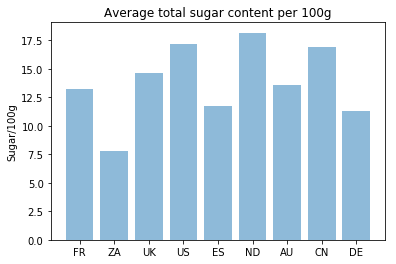

In [15]:
def mean(l):
    return float(sum(l)) / len(l)

world_sugars = df_base[df_base.sugars_100g.notnull()]

def return_sugars(country):
    return world_sugars[world_sugars.countries == country].sugars_100g.tolist()
    
# Get list of sugars per 100g for some countries
fr_sugars = return_sugars('france') + return_sugars('en:fr')
za_sugars = return_sugars('south africa')
uk_sugars = return_sugars('united kingdom') + return_sugars('en:gb')
us_sugars = return_sugars('united states') + return_sugars('en:us') + return_sugars('us')
sp_sugars = return_sugars('spain') + return_sugars('españa') + return_sugars('en:es')
nd_sugars = return_sugars('netherlands') + return_sugars('holland')
au_sugars = return_sugars('australia') + return_sugars('en:au')
cn_sugars = return_sugars('canada') + return_sugars('en:cn')
de_sugars = return_sugars('germany')

countries = ['FR', 'ZA', 'UK', 'US', 'ES', 'ND', 'AU', 'CN', 'DE']
sugars_l = [mean(fr_sugars), 
            mean(za_sugars), 
            mean(uk_sugars), 
            mean(us_sugars), 
            mean(sp_sugars), 
            mean(nd_sugars),
            mean(au_sugars),
            mean(cn_sugars),
            mean(de_sugars)]
            
y_pos = np.arange(len(countries))
    
plt.bar(y_pos, sugars_l, align='center', alpha=0.5)
plt.title('Average total sugar content per 100g')
plt.xticks(y_pos, countries)
plt.ylabel('Sugar/100g')
    
plt.show()

## Which countries eat the most sugar?
Interesting results, although for a number of countries the amount of data is a lot less (particularly countries like South Africa), and thus the data can be skewed. Another interesting note is the lack of any data on total sugars for Asian countries such as Japan and China. There are not many data entries for these countries either, but there are enough to make me wonder why there is no data on their sugar intake.

I'm making an assumption that food in the database, tied to a country, is consumed on a regular basis by its citizens, or at least often enough to keep these products on the shelves. The ranking of the countries analysed was this:

- Netherlands
- Canada
- UK/USA
- Australia
- France
- Germany
- Spain
- South Africa

In [9]:
df_base.shape

(356027, 163)

In [12]:
df_base.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_base.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

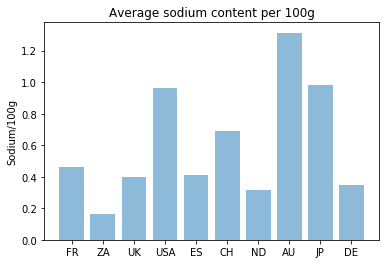

In [17]:
world_sodium = df_base[df_base.sodium_100g.notnull()]

def return_sodium(country):
    return world_sodium[world_sodium.countries == country].sodium_100g.tolist()
    
# Get list of sodium per 100g for some countries
fr_sodium = return_sodium('france') + return_sodium('en:fr')
za_sodium = return_sodium('south africa')
uk_sodium = return_sodium('united kingdom') + return_sodium('en:gb')
us_sodium = return_sodium('united states') + return_sodium('en:us') + return_sodium('us')
sp_sodium = return_sodium('spain') + return_sodium('españa') + return_sodium('en:es')
ch_sodium = return_sodium('china')
nd_sodium = return_sodium('netherlands') + return_sodium('holland')
au_sodium = return_sodium('australia') + return_sodium('en:au')
jp_sodium = return_sodium('japan') + return_sodium('en:jp')
de_sodium = return_sodium('germany')

countries = ['FR', 'ZA', 'UK', 'USA', 'ES', 'CH', 'ND', 'AU', 'JP', 'DE']
sodium_l = [mean(fr_sodium), 
            mean(za_sodium), 
            mean(uk_sodium), 
            mean(us_sodium), 
            mean(sp_sodium), 
            mean(ch_sodium),
            mean(nd_sodium),
            mean(au_sodium),
            mean(jp_sodium),
            mean(de_sodium)]

y_pos = np.arange(len(countries))
    
plt.bar(y_pos, sodium_l, align='center', alpha=0.5)
plt.title('Average sodium content per 100g')
plt.xticks(y_pos, countries)
plt.ylabel('Sodium/100g')
    
plt.show()

## Which countries eat the most salt?
Same as before, based on the same assumptions. Also of interest is that the amount of sodium in food, on average per 100g, is far, far less than the amount of sugar.

The countries analysed were ranked like so:

- China
- Netherlands
- USA
- Australia
- Spain
- France
- Germany
- UK
- South Africa
- Japan

## How Many Additives Are In Our Food?
Next is how many additives are in our food on average

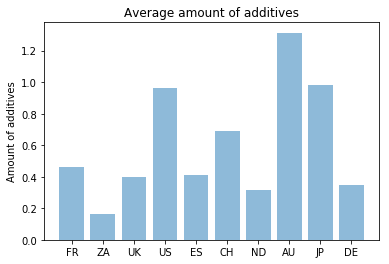

In [18]:
world_additives = df_base[df_base.additives_n.notnull()]

def return_additives(country):
    return world_additives[world_additives.countries == country].additives_n.tolist()
    
# Get list of additives amounts for some countries
fr_additives = return_additives('france') + return_additives('en:fr')
za_additives = return_additives('south africa')
uk_additives = return_additives('united kingdom') + return_additives('en:gb')
us_additives = return_additives('united states') + return_additives('en:us') + return_additives('us')
sp_additives = return_additives('spain') + return_additives('españa') + return_additives('en:es')
ch_additives = return_additives('china')
nd_additives = return_additives('netherlands') + return_additives('holland')
au_additives = return_additives('australia') + return_additives('en:au')
jp_additives = return_additives('japan') + return_additives('en:jp')
de_additives = return_additives('germany')

countries = ['FR', 'ZA', 'UK', 'US', 'ES', 'CH', 'ND', 'AU', 'JP', 'DE']
additives_l = [mean(fr_additives), 
            mean(za_additives), 
            mean(uk_additives), 
            mean(us_additives), 
            mean(sp_additives), 
            mean(ch_additives),
            mean(nd_additives),
            mean(au_additives),
            mean(jp_additives),
            mean(de_additives)]

y_pos = np.arange(len(countries))
    
plt.bar(y_pos, sodium_l, align='center', alpha=0.5)
plt.title('Average amount of additives')
plt.xticks(y_pos, countries)
plt.ylabel('Amount of additives')
    
plt.show()

## Which countries' food contains the most additives?
I don't really worry about how many additives are in my food, but the results here are interesting again, mostly because it seems like there aren't any countries who consistently have the loweset/highest averages for these supposedly unhealthy ingredients.

The possible exceptions to this would be China, the Netherlands, and the USA. South Africa and Japan consistently have lower amounts, but they also have only a few entries in the dataset in general, which means their results could be biased in relation to other countries.

Ranking of countries by the amount of additives in their food:

- China
- Netherlands
- USA
- France
- Australia
- Spain
- Germany
- UK
- South Africa
- Japan